In [1]:
import rasterio as rio

In [2]:
# Path to the image
path = "C:/Users/User/Projects/Kolkata.tif"
rio.open(path)


<open DatasetReader name='C:/Users/User/Projects/Kolkata.tif' mode='r'>

In [3]:
data = rio.open(path)

In [4]:
data.crs #co-ordinate reference system

CRS.from_epsg(32645)

In [5]:
data.meta #Info of the data

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -1.0,
 'width': 580,
 'height': 980,
 'count': 1,
 'crs': CRS.from_epsg(32645),
 'transform': Affine(100.0, 0.0, 611456.1164169456,
        0.0, -100.0, 2570538.138633574)}

In [6]:
image_allbands = data.read()
image_allbands

array([[[104., 104., 104., ..., 104., 104., 104.],
        [104., 104., 104., ..., 104., 104., 104.],
        [104., 104., 104., ..., 104., 104., 104.],
        ...,
        [ -1.,  -1.,  -1., ..., 104., 104., 104.],
        [ -1.,  -1.,  -1., ..., 104., 104., 104.],
        [ -1.,  -1.,  -1., ..., 104., 104., 104.]]], dtype=float32)

In [7]:
image_allbands.shape #3 bands, width and height

(1, 980, 580)

In [8]:
from rasterio.plot import show
import matplotlib.pyplot as plt

<AxesSubplot:>

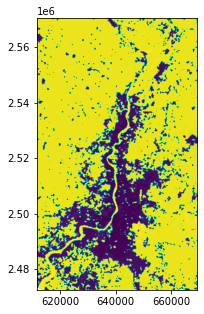

In [9]:
fig,ax = plt.subplots(figsize =(5,5))
show(data,ax = ax)

In [10]:
from sklearn.cluster import KMeans

In [11]:
img_to_cluster = image_allbands.reshape((-1,1))

In [12]:
img_to_cluster.shape

(568400, 1)

In [13]:
img_to_cluster

array([[104.],
       [104.],
       [104.],
       ...,
       [104.],
       [104.],
       [104.]], dtype=float32)

In [14]:
k_mean = KMeans(n_clusters = 10)

In [15]:
k_mean.fit(img_to_cluster)

KMeans(n_clusters=10)

In [16]:
clusters = k_mean.labels_

In [17]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
cluster_img = clusters.reshape(image_allbands.shape)

In [19]:
cluster_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [9, 9, 9, ..., 0, 0, 0],
        [9, 9, 9, ..., 0, 0, 0],
        [9, 9, 9, ..., 0, 0, 0]]])

In [20]:
cluster_img.shape

(1, 980, 580)

<AxesSubplot:>

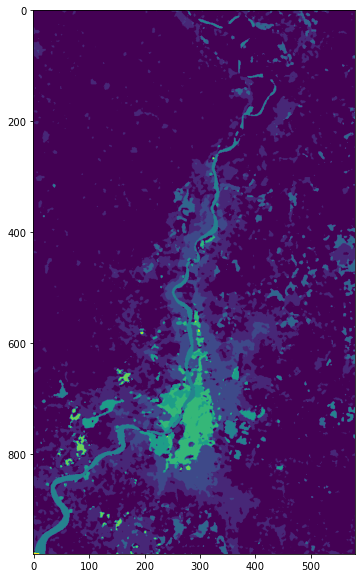

In [21]:
fig,ax = plt.subplots(figsize=(20,10))
show(cluster_img,ax=ax) #

In [22]:
from sklearn.metrics import silhouette_score


score = silhouette_score(img_to_cluster, k_mean.labels_)
print(score)

0.9997031
